# What the Code Does — Summary

## **1. Imputer**

Handles missing values by replacing all `NaN` entries with the **mean** of each column.
Method used:

```python
SimpleImputer(strategy="mean")
```

---

## **2. K-Means Clustering**

Performs K-Means with **3 clusters**, then selects the **two largest clusters** based on the number of data points.

---

## **3. Support Vector Machine (SVM)**

Trains an SVM classifier on the two largest clusters.

### Kernel:

**RBF (Radial Basis Function)**

### Why RBF?

It forms a **non-linear decision boundary**, which works well for most real-world data.

### Output:

The model prints the **classification accuracy** achieved on the selected clusters.

---

## **4. Visualization**

Produces a plot of:

* The selected two clusters (colored differently)
* The **SVM decision boundary** computed from the model
* A contour plot showing the regions classified into each cluster

This allows you to visually interpret how well the SVM separates the clusters.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### 1. Load dataset

In [40]:
df = pd.read_csv("Salary_Data.csv")

# Take only numeric features
X = df.select_dtypes(include=[np.number])

### 2. Fix NaN using imputer

In [41]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

### 3. Scale

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. PCA → reduce to 2 dimensions (for plotting + SVM)

In [43]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X_scaled)

### 5. KMeans: find 3 clusters, take 2 largest

In [44]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X2D)

cluster_sizes = pd.Series(labels).value_counts()
top2 = cluster_sizes.index[:2]

print("Top 2 clusters:", list(top2))
print("Cluster sizes:")
print(cluster_sizes)

mask = np.isin(labels, top2)
X_f = X2D[mask]
y_f = labels[mask]

Top 2 clusters: [0, 2]
Cluster sizes:
0    2876
2    2452
1    1376
Name: count, dtype: int64


### 6. SVM on 2 biggest clusters

In [45]:
svm = SVC(kernel='rbf', gamma='scale')
svm.fit(X_f, y_f)

y_pred = svm.predict(X_f)
acc = accuracy_score(y_f, y_pred)

print("\nSVM accuracy:", acc)


SVM accuracy: 0.9981231231231231


### 7. Plot SVM decision boundary

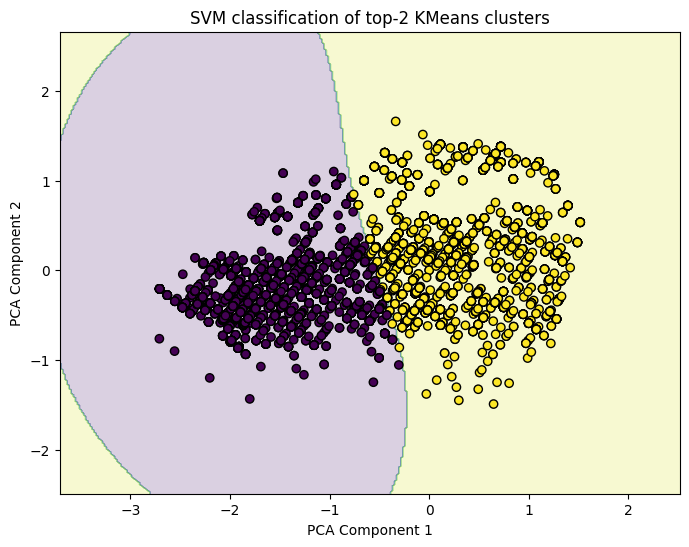

In [46]:
plt.figure(figsize=(8, 6))

x_min, x_max = X_f[:, 0].min() - 1, X_f[:, 0].max() + 1
y_min, y_max = X_f[:, 1].min() - 1, X_f[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X_f[:, 0], X_f[:, 1], c=y_f, edgecolor='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM classification of top-2 KMeans clusters")

plt.show()